# ML using Python : Cross - Validation 


Priyaranjan Mohanty

## 1) Overview of Bias and Variance

In supervised machine learning an algorithm learns a model from training data.

The goal of any supervised machine learning algorithm is to best estimate the mapping function (f) for the output variable (Y) given the input data (X). The mapping function is often called the target function because it is the function that a given supervised machine learning algorithm aims to approximate.


The prediction error for any machine learning algorithm can be broken down into three parts:

    Bias Error
    Variance Error
    Irreducible Error

The irreducible error cannot be reduced regardless of what algorithm is used. It is the error introduced from the chosen framing of the problem and may be caused by factors like unknown variables that influence the mapping of the input variables to the output variable.

In this post, we will focus on the two parts we can influence with our machine learning algorithms. The bias error and the variance error.

## 2) Why do Models have Bias or Variance in Model Performance 


Let’s understand this using the below snapshot illustrating the fit of various models:

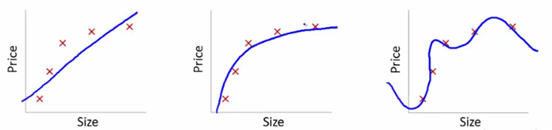

Here, we are trying to find the relationship between size and price. To achieve this, we have taken the following steps:

a) We’ve established the relationship using a linear equation for which the plots have been shown. The first plot has a high error from training data points. Therefore, this will not perform well on either Training or Actual data. This is an example of “Underfitting”. In this case, our model fails to capture the underlying trend of the data . This is also called High Bias .


b) In the second plot, we just found the right relationship between price and size, i.e., low training error and generalization of the relationship

c) In the third plot, we found a relationship which has almost zero training error. This is because the relationship is developed by considering each deviation in the data point (including noise), i.e., the model is too sensitive and captures random patterns which are present only in the current dataset. This is an example of “Overfitting”. This is also called High Variance .

## 3) How to address the issue of Overfitting / Underfitting

A common practice in data science Projects is to iterate over various models to find a better performing model.

However, it becomes difficult to distinguish whether this improvement in score is coming because we are capturing the relationship better, or we are just over-fitting the data. To find the right answer for this question, we use validation techniques. This method helps us in achieving more generalized relationships.

### What is Cross Validation?


Cross Validation is a technique which involves reserving a particular sample of a dataset on which you do not train the model. Later, you test your model on this sample before finalizing it.

Here are the steps involved in cross validation:

You reserve a sample data set
Train the model using the remaining part of the dataset
Use the reserve sample of the test (validation) set. This will help you in gauging the effectiveness of your model’s performance. If your model delivers a positive result on validation data, go ahead with the current model. 

### A few common methods used for Cross Validation


There are various methods available for performing cross validation. I’ve discussed a few of them in this section.
 

###### The validation set approach

In this approach, we reserve 50% of the dataset for validation and the remaining 50% for model training. However, a major disadvantage of this approach is that since we are training a model on only 50% of the dataset, there is a huge possibility that we might miss out on some interesting information about the data which will lead to a higher bias.

In [2]:
# Sample Code for Validation Set Approach 

import numpy as np
from sklearn.model_selection import train_test_split

X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([1, 2, 3, 4])

train, validation = train_test_split(X, test_size=0.50, random_state = 5)

print(train.shape)

print(validation.shape)

(2, 2)
(2, 2)


### Leave one out cross validation (LOOCV)

In this approach, we reserve only one data point from the available dataset, and train the model on the rest of the data. This process iterates for each data point. This also has its own advantages and disadvantages. Let’s look at them:

1) We make use of all data points, hence the bias will be low

2) We repeat the cross validation process n times (where n is number of data points) which results in a higher execution time

3) This approach leads to higher variation in testing model effectiveness because we test against one data point. So, our estimation gets highly influenced by the data point. If the data point turns out to be an outlier, it can lead to a higher variation

In [3]:

import numpy as np
from sklearn.model_selection import LeaveOneOut

X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([1, 2, 3, 4])

loo = LeaveOneOut()
print('Number of Splits :' ,loo.get_n_splits(X))


for train_index, test_index in loo.split(X):
        print("train:", train_index, "validation:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

Number of Splits : 4
train: [1 2 3] validation: [0]
train: [0 2 3] validation: [1]
train: [0 1 3] validation: [2]
train: [0 1 2] validation: [3]


### k-fold cross validation

From the above two validation methods, we’ve learnt:

We should train the model on a large portion of the dataset. Otherwise we’ll fail to read and recognise the underlying trend in the data. This will eventually result in a higher bias

We also need a good ratio of testing data points. As we have seen above, less amount of data points can lead to a variance error while testing the effectiveness of the model

We should iterate on the training and testing process multiple times. We should change the train and test dataset distribution. This helps in validating the model effectiveness properly

Do we have a method which takes care of all these 3 requirements?

Yes! That method is known as “k-fold cross validation”. It’s easy to follow and implement. Below are the steps for it:

Randomly split your entire dataset into k”folds”

For each k-fold in your dataset, build your model on k – 1 folds of the dataset. Then, test the model to check the effectiveness for kth fold

Record the error you see on each of the predictions

Repeat this until each of the k-folds has served as the test set

The average of your k recorded errors is called the cross-validation error and will serve as your performance metric for the model

Below is the visualization of a k-fold validation when k=10.

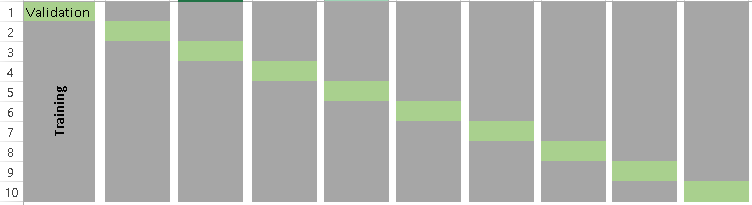

### Evaluating a ML model using K-Fold CV

In [4]:
import pandas
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np

In [5]:
Housing_DF = np.loadtxt('Housing_2.txt')

In [6]:
Housing_DF.shape

(506, 14)

In [9]:
X = Housing_DF[:, range(0,13)]
y = Housing_DF[:, 13]

In [10]:
X.shape

(506, 13)

In [11]:
y.shape

(506,)

In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

### K-Fold CV

In [13]:
scores = []

best_svr = SVR(kernel='rbf')

cv = KFold(n_splits=10, random_state=42, shuffle=False)

for train_index, test_index in cv.split(X):
    print("Train Index: ", train_index, "\n")
    print("Test Index: ", test_index)

    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))

Train Index:  [ 51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284
 285 286 287 288 289 290 291 292 293 

C:\Users\itzpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\itzpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\itzpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284
 285 286 287 288 289 290 291 292 293 

C:\Users\itzpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\itzpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\itzpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\itzpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 255 256 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284
 285 286 287 288 289 290 291 292 293 294 295 296 2

 500 501 502 503 504 505] 

Test Index:  [406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421 422 423
 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441
 442 443 444 445 446 447 448 449 450 451 452 453 454 455]
Train Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 18

C:\Users\itzpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\itzpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\itzpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [29]:
scores

[0.44400612926122673,
 0.24305814572862905,
 0.3592862676188462,
 -0.4534805485743354,
 -0.12009965500350872,
 -0.5129737608134557,
 0.18154687088987034,
 0.14936307528678372,
 -0.3754937827208715,
 0.10515003500860876]

In [30]:
print(np.mean(scores))

0.0020362776681793426


#### Instead of this somewhat tedious method, we can use

In [14]:
from sklearn.model_selection import cross_val_score

cross_val_score(best_svr, X, y, cv=10)

C:\Users\itzpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\itzpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\itzpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\itzpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

array([ 0.44400613,  0.24305815,  0.35928627, -0.45348055, -0.12009966,
       -0.51297376,  0.18154687,  0.14936308, -0.37549378,  0.10515004])

In [15]:
cross_val_score(best_svr, X, y, cv=10).mean()

C:\Users\itzpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\itzpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\itzpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\itzpr\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

0.0020362776681793426